In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

In [2]:
sns.set()
pd.set_option('display.max_columns', None)

## Использование статистических критериев

In [10]:
df = sns.load_dataset('penguins')

In [25]:
bmg = df.body_mass_g.dropna()

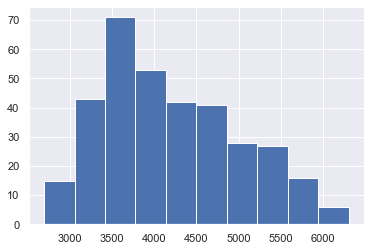

In [26]:
df.body_mass_g.hist();

#### Сравнение с известным значением среднего генсовокупности

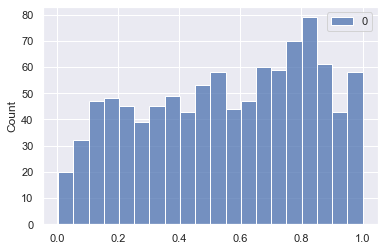

In [20]:
# t-тест сравнения с известным значением
N = 1000
p_values = pd.DataFrame([0] * N)
for i in range(N):
    p_values.iloc[i] = sps.ttest_1samp(bmg.sample(100), bmg.mean())[1]
    # print(p_values)
sns.histplot(p_values, bins=20);

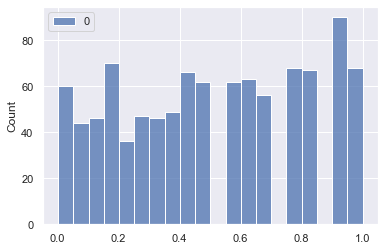

In [22]:
# не нашел одновыборочных критериев для сравнения с известным значением кроме ttest_1samp
# можно ли в 2-хвыборочный критерий Вилкоксона запихать массив из известных значений :)
N = 1000
p_values = pd.DataFrame([0] * N)
for i in range(N):
    p_values.iloc[i] = sps.wilcoxon(bmg.sample(10), [bmg.mean()] * 10)[1]
    # print(p_values)
sns.histplot(p_values, bins=20);

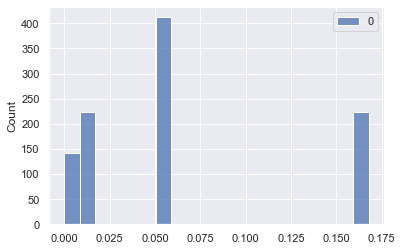

In [24]:
# о сущности теста Колмогорова-Cмирнова я явно не догадываюсь
N = 1000
p_values = pd.DataFrame([0] * N)
for i in range(N):
    p_values.iloc[i] = sps.ks_2samp(bmg.sample(10), [bmg.mean()] * 10)[1]
    # print(p_values)
sns.histplot(p_values, bins=20);

#### Сравнение двух групп

In [13]:
N = 30
tt_count = 0
mw_count = 0
ttmw_count = 0
for _ in range(10000):
    bmg1 = bmg.sample(N)
    bmg2 = bmg.sample(N)
    tt = sps.ttest_ind(bmg1, bmg2)[1]
    mw = sps.mannwhitneyu(bmg1, bmg2)[1]
    # diff = abs(bmg1.mean() - bmg2.mean())
    if tt < 0.05:
        tt_count += 1
    if mw < 0.05:
        mw_count += 1
    if tt < 0.05 and mw < 0.05:
        ttmw_count += 1
tt_count, mw_count, ttmw_count

(412, 799, 406)

Манн-Уитни увидели различие у групп (взятых из одной ГС) в ~8% случаев, а t-тест - 4% (почти всегда сигналил одновременно с МУ)

In [30]:
N = 100
tt_count = 0
mw_count = 0
ttmw_count = 0
for _ in range(10000):
    bmg1 = bmg.sample(N)
    bmg2 = bmg.sample(N)
    tt = sps.ttest_ind(bmg1, bmg2)[1]
    mw = sps.mannwhitneyu(bmg1, bmg2)[1]
    # diff = abs(bmg1.mean() - bmg2.mean())
    if tt < 0.05:
        tt_count += 1
    if mw < 0.05:
        mw_count += 1
    if tt < 0.05 and mw < 0.05:
        ttmw_count += 1
tt_count, mw_count, ttmw_count

(203, 489, 202)

При выборке 100 элементов ошибочных суждений уже меньше.  
А разве не должно быть 5%?

In [31]:
N = 10
tt_count = 0
mw_count = 0
ttmw_count = 0
for _ in range(10000):
    bmg1 = bmg.sample(N)
    bmg2 = bmg.sample(N)
    tt = sps.ttest_ind(bmg1, bmg2)[1]
    mw = sps.mannwhitneyu(bmg1, bmg2)[1]
    # diff = abs(bmg1.mean() - bmg2.mean())
    if tt < 0.05:
        tt_count += 1
    if mw < 0.05:
        mw_count += 1
    if tt < 0.05 and mw < 0.05:
        ttmw_count += 1
tt_count, mw_count, ttmw_count

(479, 874, 468)

In [32]:
N = 5
tt_count = 0
mw_count = 0
ttmw_count = 0
for _ in range(10000):
    bmg1 = bmg.sample(N)
    bmg2 = bmg.sample(N)
    tt = sps.ttest_ind(bmg1, bmg2)[1]
    mw = sps.mannwhitneyu(bmg1, bmg2)[1]
    # diff = abs(bmg1.mean() - bmg2.mean())
    if tt < 0.05:
        tt_count += 1
    if mw < 0.05:
        mw_count += 1
    if tt < 0.05 and mw < 0.05:
        ttmw_count += 1
tt_count, mw_count, ttmw_count

(541, 906, 521)

При небольших объемах выборки, похоже, Манн-Уитни "ухудшается" не так быстро. Тем не менее все равно много чаще ошибается.

In [33]:
# прибавим по gain грамм каждому
bmg_1 = bmg
gain = 100
bmg_2 = bmg + gain

In [34]:
N = 30
tt_count = 0
mw_count = 0
ttmw_count = 0
for _ in range(10000):
    bmg1 = bmg_1.sample(N)
    bmg2 = bmg_2.sample(N)
    tt = sps.ttest_ind(bmg1, bmg2)[1]
    mw = sps.mannwhitneyu(bmg1, bmg2)[1]
    if tt < 0.05:
        tt_count += 1
    if mw < 0.05:
        mw_count += 1
    if tt < 0.05 and mw < 0.05:
        ttmw_count += 1
tt_count, mw_count, ttmw_count

(617, 1203, 611)

Разницу в 100 грамм на выборке в 30 особей t-тест видел вдвое реже МУ и почти всегда одновременно с ним. МУ вдвое мощнее!

In [35]:
bmg_1 = bmg
gain = 500
bmg_2 = bmg + gain

In [36]:
N = 30
tt_count = 0
mw_count = 0
ttmw_count = 0
for _ in range(10000):
    bmg1 = bmg_1.sample(N)
    bmg2 = bmg_2.sample(N)
    tt = sps.ttest_ind(bmg1, bmg2)[1]
    mw = sps.mannwhitneyu(bmg1, bmg2)[1]
    if tt < 0.05:
        tt_count += 1
    if mw < 0.05:
        mw_count += 1
    if tt < 0.05 and mw < 0.05:
        ttmw_count += 1
tt_count, mw_count, ttmw_count

(6639, 7770, 6624)

Разницу в 500 грамм на выборке в 30 особей t-тест увидел в 66% (почти всегда одновременно с МУ), МУ - в 78%. Все равно МУ мощнее, но при таком заметном отличии уже не настолько

In [37]:
N = 7
tt_count = 0
mw_count = 0
ttmw_count = 0
for _ in range(10000):
    bmg1 = bmg_1.sample(N)
    bmg2 = bmg_2.sample(N)
    tt = sps.ttest_ind(bmg1, bmg2)[1]
    mw = sps.mannwhitneyu(bmg1, bmg2)[1]
    if tt < 0.05:
        tt_count += 1
    if mw < 0.05:
        mw_count += 1
    if tt < 0.05 and mw < 0.05:
        ttmw_count += 1
tt_count, mw_count, ttmw_count

(1836, 2846, 1810)

При небольших объемах выборки оба теста в значительно меньшей степени склонны признавать разницу. МУ раза в полтора мощнее.

#### Сравнение двух связных групп

In [41]:
N = 30
tt_count = 0
mw_count = 0
ttmw_count = 0
for _ in range(10000):
    bmg1 = bmg.sample(N)
    bmg2 = bmg.sample(N)
    tt = sps.ttest_rel(bmg1, bmg2)[1]
    mw = sps.wilcoxon(bmg1, bmg2)[1]
    if tt < 0.05:
        tt_count += 1
    if mw < 0.05:
        mw_count += 1
    if tt < 0.05 and mw < 0.05:
        ttmw_count += 1
tt_count, mw_count, ttmw_count

(412, 389, 337)

И Вилкоксон и t-тест увидели различие у групп (случайно надерганных из одной ГС) в ~4% случаев. Из них в 3% случаев сигналили одновременно

In [42]:
N = 30
tt_count = 0
mw_count = 0
ttmw_count = 0
for _ in range(10000):
    bmg1 = bmg.sample(N)
    bmg2 = bmg1 + 20 + 100 * np.random.randn(N)  # прибавим по несколько грамм каждому
    tt = sps.ttest_rel(bmg1, bmg2)[1]
    mw = sps.wilcoxon(bmg1, bmg2)[1]
    if tt < 0.05:
        tt_count += 1
    if mw < 0.05:
        mw_count += 1
    if tt < 0.05 and mw < 0.05:
        ttmw_count += 1
tt_count, mw_count, ttmw_count

(1928, 1850, 1676)

При выборке в 30 особей Вилкоксон и t-тест для связных выборок различия видят одинаково часто, как правило одновременно

In [14]:
N = 7
tt_count = 0
mw_count = 0
ttmw_count = 0
for _ in range(10000):
    bmg1 = bmg.sample(N)
    bmg2 = bmg1 + 20 + 100 * np.random.randn(N)  # прибавим по несколько грамм каждому
    tt = sps.ttest_rel(bmg1, bmg2)[1]
    mw = sps.wilcoxon(bmg1, bmg2)[1]
    if tt < 0.05:
        tt_count += 1
    if mw < 0.05:
        mw_count += 1
    if tt < 0.05 and mw < 0.05:
        ttmw_count += 1
tt_count, mw_count, ttmw_count

(731, 658, 597)

На выборке 7 приблизительно то же самое

#### Сравнение трех несвязных групп

In [28]:
N = 30
kw_count = 0
an_count = 0
ankw_count = 0
for _ in range(10_000):
    bmg1 = bmg.sample(N)
    bmg2 = bmg.sample(N)
    bmg3 = bmg.sample(N)
    an = sps.f_oneway(bmg1, bmg2, bmg3)[1]
    kw = sps.kruskal(bmg1, bmg2, bmg3)[1]
    if an < 0.05:
        an_count += 1
    if kw < 0.05:
        kw_count += 1
    if an < 0.05 and kw < 0.05:
        ankw_count += 1
an_count, kw_count, ankw_count

(377, 351, 286)

И Краскел-Уоллес и ANOVA увидели различие у выборок в 30 особей (взятых из одной ГС) в ~3,5% случаев. Из них в ~3% случаев сигналили одновременно

In [30]:
N = 100
kw_count = 0
an_count = 0
ankw_count = 0
for _ in range(10_000):
    bmg1 = bmg.sample(N)
    bmg2 = bmg.sample(N)
    bmg3 = bmg.sample(N)
    an = sps.f_oneway(bmg1, bmg2, bmg3)[1]
    kw = sps.kruskal(bmg1, bmg2, bmg3)[1]
    if an < 0.05:
        an_count += 1
    if kw < 0.05:
        kw_count += 1
    if an < 0.05 and kw < 0.05:
        ankw_count += 1
an_count, kw_count, ankw_count

(138, 119, 95)

И Краскел-Уоллес и ANOVA  значительно реже (втрое) видят несуществующую разницу при увеличении выборки до 100

In [29]:
N = 7
kw_count = 0
an_count = 0
ankw_count = 0
for _ in range(10_000):
    bmg1 = bmg.sample(N)
    bmg2 = bmg.sample(N)
    bmg3 = bmg.sample(N)
    an = sps.f_oneway(bmg1, bmg2, bmg3)[1]
    kw = sps.kruskal(bmg1, bmg2, bmg3)[1]
    if an < 0.05:
        an_count += 1
    if kw < 0.05:
        kw_count += 1
    if an < 0.05 and kw < 0.05:
        ankw_count += 1
an_count, kw_count, ankw_count

(482, 397, 329)

При выборке в 7 особей показатели, вполне соразмерно, ухудшаются

#### Сравнение трех несвязных групп

In [17]:
N = 30
fm_count = 0
an_count = 0
anfm_count = 0
for _ in range(10_000):
    bmg1 = bmg.sample(N)
    bmg2 = bmg1 + 20 + 100 * np.random.randn(N)  # прибавим по несколько грамм каждому
    bmg3 = bmg1 + 40 + 100 * np.random.randn(N)  # прибавим по несколько грамм каждому
    an = sps.f_oneway(bmg1, bmg2, bmg3)[1]  # не нашел anova для связных выборок
    fm = sps.friedmanchisquare(bmg1, bmg2, bmg3)[1]
    if an < 0.05:
        an_count += 1
    if fm < 0.05:
        fm_count += 1
    if an < 0.05 and fm < 0.05:
        anfm_count += 1
an_count, fm_count, anfm_count

(0, 3419, 0)

При моих данных Фридман прокрасился в 34% случаев при выборке в 30 особей

In [31]:
N = 7
fm_count = 0
an_count = 0
anfm_count = 0
for _ in range(10_000):
    bmg1 = bmg.sample(N)
    bmg2 = bmg1 + 20 + 100 * np.random.randn(N)  # прибавим по несколько грамм каждому
    bmg3 = bmg1 + 40 + 100 * np.random.randn(N)  # прибавим по несколько грамм каждому
    an = sps.f_oneway(bmg1, bmg2, bmg3)[1]  # не нашел anova для связных выборок
    fm = sps.friedmanchisquare(bmg1, bmg2, bmg3)[1]
    if an < 0.05:
        an_count += 1
    if fm < 0.05:
        fm_count += 1
    if an < 0.05 and fm < 0.05:
        anfm_count += 1
an_count, fm_count, anfm_count

(0, 1052, 0)

При выбоке в 7 особей прокрасок уже втрое меньше

Посмотрим некоторые показатели на одном виде пингвинов

In [18]:
bmg = df[df.species == 'Gentoo'].body_mass_g.dropna()

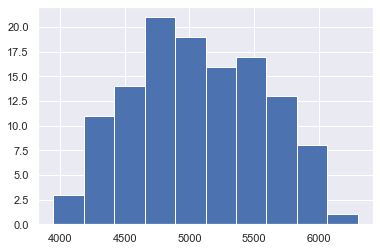

In [19]:
bmg.hist();

Выглядит более нормально, чем общая гистограмма трех видов?

In [21]:
N = 5
tt_count = 0
mw_count = 0
ttmw_count = 0
for _ in range(10000):
    bmg1 = bmg.sample(N)
    bmg2 = bmg.sample(N)
    tt = sps.ttest_ind(bmg1, bmg2)[1]
    mw = sps.mannwhitneyu(bmg1, bmg2)[1]
    if tt < 0.05:
        tt_count += 1
    if mw < 0.05:
        mw_count += 1
    if tt < 0.05 and mw < 0.05:
        ttmw_count += 1
tt_count, mw_count, ttmw_count

(518, 839, 488)

Не сильное отличие-то от случая с тремя видами для двух несвязных групп

In [23]:
# прибавим по gain грамм каждому
bmg_1 = bmg
gain = 100
bmg_2 = bmg + gain

In [24]:
N = 7
tt_count = 0
mw_count = 0
ttmw_count = 0
for _ in range(10000):
    bmg1 = bmg_1.sample(N)
    bmg2 = bmg_2.sample(N)
    tt = sps.ttest_ind(bmg1, bmg2)[1]
    mw = sps.mannwhitneyu(bmg1, bmg2)[1]
    if tt < 0.05:
        tt_count += 1
    if mw < 0.05:
        mw_count += 1
    if tt < 0.05 and mw < 0.05:
        ttmw_count += 1
tt_count, mw_count, ttmw_count

(601, 1041, 585)

А для различающихся групп МУ получше стал видеть отличия выборок. Раза в 1,5

## Бутстрап

In [108]:
arr = np.random.normal(10, 10, 100)

In [109]:
arr[-5:] = 100, 200, 300, 400, 500

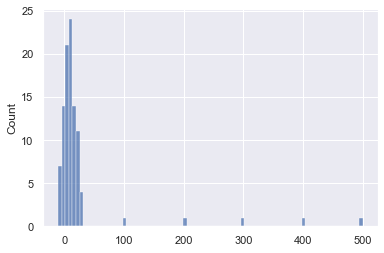

In [110]:
sns.histplot(arr);

In [111]:
arr.mean()

23.717190149596153

In [112]:
N_EXPERIMENTS = 1000
SAMPLE_SIZE = 30
sample_means = np.zeros(N_EXPERIMENTS)
for i in range(N_EXPERIMENTS):
    sample_means[i] = np.random.choice(arr, SAMPLE_SIZE, True).mean()

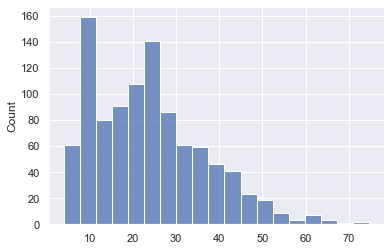

In [113]:
sns.histplot(sample_means);

In [116]:
sample_means.sort()

In [117]:
sample_means[N_EXPERIMENTS // 20 - 1], sample_means[1000 - N_EXPERIMENTS // 20 - 1]

(7.634755008129374, 47.81584003764958)

In [5]:
from statsmodels.stats.proportion import proportions_ztest
from tqdm.notebook import tqdm

In [75]:
mde = 0.00  ## A/A-тест
baseline = 0.2
sample_size = 1000

In [76]:
result_proportions_ztest = []
result_chisquare = []
result_fisher = []
for _ in tqdm(range(1000)):
    a = np.random.binomial(1,baseline, size=sample_size)
    b = np.random.binomial(1,baseline + mde, size=sample_size)
    _, pval = proportions_ztest([a.sum(), b.sum()], [len(a), len(b)], )
    result_proportions_ztest.append(pval)
    _, pval = sps.chisquare([b.sum(), len(b) - b.sum()], [a.sum(), len(a) - a.sum()])
    result_chisquare.append(pval)
    _, pval = sps.fisher_exact([[b.sum(), len(b) - b.sum()], [a.sum(), len(a) - a.sum()]])
    result_fisher.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [77]:
result_proportions_ztest = pd.Series(result_proportions_ztest)
result_chisquare = pd.Series(result_chisquare)
result_fisher = pd.Series(result_fisher)

In [78]:
result_proportions_ztest.mean()

0.4959553513749348

In [79]:
result_chisquare.mean()

0.385299553013262

In [80]:
result_fisher.mean()

0.5268881141356592

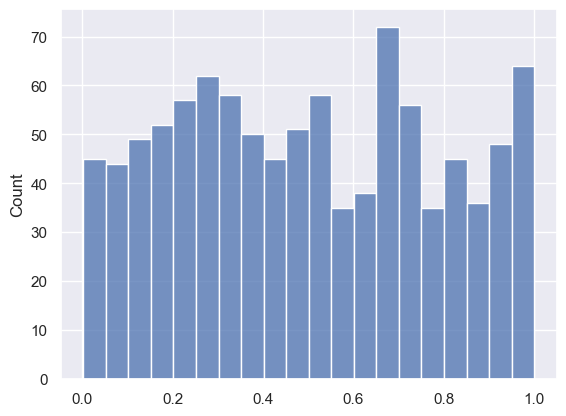

In [81]:
sns.histplot(result_proportions_ztest, bins=20);

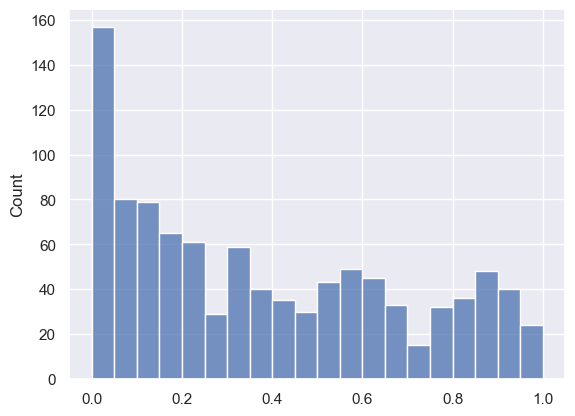

In [82]:
sns.histplot(result_chisquare, bins=20);

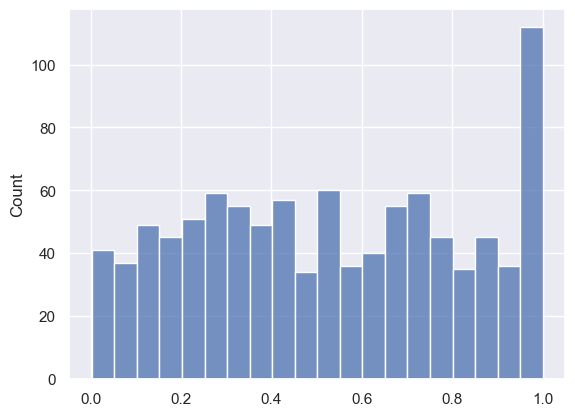

In [83]:
sns.histplot(result_fisher, bins=20);

In [ ]:
# p = 0.2, N = 100_000
population = [1] * 20_000 + [0] * 80_000

sample = np.random.choice(population, size=200)

ci = get_bernoulli_confidence_interval(sample)

# calculate margin of error
c = (ci[1] - ci[0])/2
print(c)

In [23]:
X = np.linspace(0, 50, 1001)

In [24]:
Y = sps.chi2.pdf(X, df=1)

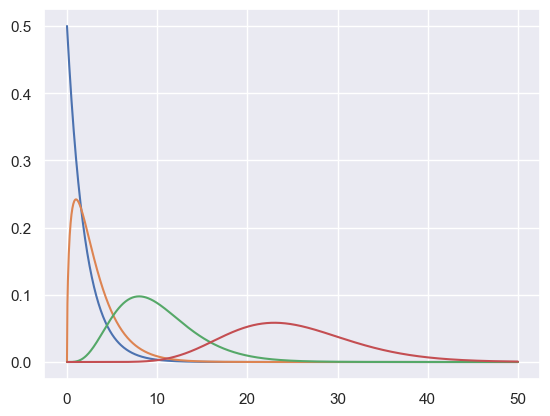

In [28]:
for i in (2, 3, 10, 25):
    Y = sps.chi2.pdf(X, df=i)
    sns.lineplot(x=X, y=Y, )

In [30]:
from statsmodels.stats.proportion import proportions_ztest

In [35]:
a = np.array([1, 0, 0, 0])
b = np.array([1, 0, 0, 1])

In [36]:
proportions_ztest([a.sum(), b.sum()], [len(a), len(b)], )

(-0.7302967433402214, 0.4652088184521418)